In [38]:
# 1. Wczytywanie danych i wyświetlanie podstawowych informacji
import pandas as pd
df = pd.read_csv('IHME_GDP_1960_2050_Y2021M09D22.CSV')
print(df.head())
print(df.info())
print(df.describe())

   location_id location_name iso3   level  year  gdp_ppp_mean  gdp_ppp_lower  \
0            1        Global    G  Global  1960  1.748345e+13   1.601915e+13   
1            1        Global    G  Global  1961  1.813537e+13   1.659537e+13   
2            1        Global    G  Global  1962  1.895328e+13   1.739039e+13   
3            1        Global    G  Global  1963  1.965662e+13   1.811706e+13   
4            1        Global    G  Global  1964  2.100575e+13   1.935664e+13   

   gdp_ppp_upper  gdp_usd_mean  gdp_usd_lower  gdp_usd_upper  
0   1.911586e+13  1.296863e+13   1.266890e+13   1.334177e+13  
1   1.982493e+13  1.346097e+13   1.314767e+13   1.383021e+13  
2   2.061477e+13  1.406576e+13   1.376060e+13   1.443746e+13  
3   2.134993e+13  1.461831e+13   1.432132e+13   1.497693e+13  
4   2.276791e+13  1.552986e+13   1.523498e+13   1.587998e+13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19838 entries, 0 to 19837
Data columns (total 11 columns):
 #   Column         Non-Null Cou

In [39]:
# 2. Obliczanie podstawowych statystyk
mean_gdp_ppp_lower = df['gdp_ppp_lower'].mean()
print('Średnia wartość gdp_ppp_lower:', mean_gdp_ppp_lower)
mean_gdp_ppp_upper = df['gdp_ppp_upper'].mean()
print('Średnia wartość gdp_ppp_upper:', mean_gdp_ppp_upper)
median_gdp_ppp_lower = df['gdp_ppp_lower'].median()
print('Mediana wartości gdp_ppp_lower:', median_gdp_ppp_lower)
median_gdp_ppp_upper = df['gdp_ppp_upper'].median()
print('Mediana wartości gdp_ppp_upper:', median_gdp_ppp_upper)
std_gdp_ppp_lower = df['gdp_ppp_lower'].std()
print('Odchylenie standardowe wartości gdp_ppp_lower:', std_gdp_ppp_lower)
std_gdp_ppp_upper = df['gdp_ppp_upper'].std()
print('Odchylenie standardowe wartości gdp_ppp_upper:', std_gdp_ppp_upper)

Średnia wartość gdp_ppp_lower: 1235788443809.8582
Średnia wartość gdp_ppp_upper: 1444078620521.2554
Mediana wartości gdp_ppp_lower: 8105.54082625498
Mediana wartości gdp_ppp_upper: 13461.7811907802
Odchylenie standardowe wartości gdp_ppp_lower: 8610029537548.005
Odchylenie standardowe wartości gdp_ppp_upper: 9789326655387.197


In [40]:
# 3. Identyfikacja i obsluga brakujących danych
missing_values = df.isnull().sum()
print('Liczba brakujących wartości w poszczególnych kolumnach:')
print(missing_values)

Liczba brakujących wartości w poszczególnych kolumnach:
location_id         0
location_name       0
iso3             1183
level               0
year                0
gdp_ppp_mean        0
gdp_ppp_lower       0
gdp_ppp_upper       0
gdp_usd_mean        0
gdp_usd_lower       0
gdp_usd_upper       0
dtype: int64


In [41]:
# 3. Identyfikacja i obsluga brakujących danych (c.d.)

# Uzupełnianie brakujących wartości iso3 (kod kraju) na podstawie location_name (nazwa kraju)
df['iso3'] = df['iso3'].fillna(df['location_name'].str[:3])
missing_values = df.isnull().sum()
print('Liczba brakujących wartości w poszczególnych kolumnach po uzupełnieniu:')
print(missing_values)

Liczba brakujących wartości w poszczególnych kolumnach po uzupełnieniu:
location_id      0
location_name    0
iso3             0
level            0
year             0
gdp_ppp_mean     0
gdp_ppp_lower    0
gdp_ppp_upper    0
gdp_usd_mean     0
gdp_usd_lower    0
gdp_usd_upper    0
dtype: int64


In [42]:
# 4. Wykrywanie wartości odstających (używając metody IRQ):
Q1 = df['gdp_ppp_upper'].quantile(0.25)
Q3 = df['gdp_ppp_upper'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['gdp_ppp_upper'] < lower_bound) | (df['gdp_ppp_upper'] > upper_bound)]
print('Wartości odstające w kolumnie gdp_ppp_upper:')
print(outliers)

Wartości odstające w kolumnie gdp_ppp_upper:
       location_id location_name iso3                    level  year  \
0                1        Global    G                   Global  1960   
1                1        Global    G                   Global  1961   
2                1        Global    G                   Global  1962   
3                1        Global    G                   Global  1963   
4                1        Global    G                   Global  1964   
...            ...           ...  ...                      ...   ...   
19833        44578    Low income  Low  World Bank Income Group  2046   
19834        44578    Low income  Low  World Bank Income Group  2047   
19835        44578    Low income  Low  World Bank Income Group  2048   
19836        44578    Low income  Low  World Bank Income Group  2049   
19837        44578    Low income  Low  World Bank Income Group  2050   

       gdp_ppp_mean  gdp_ppp_lower  gdp_ppp_upper  gdp_usd_mean  \
0      1.748345e+13   1

<Axes: xlabel='gdp_ppp_lower', ylabel='gdp_ppp_upper'>

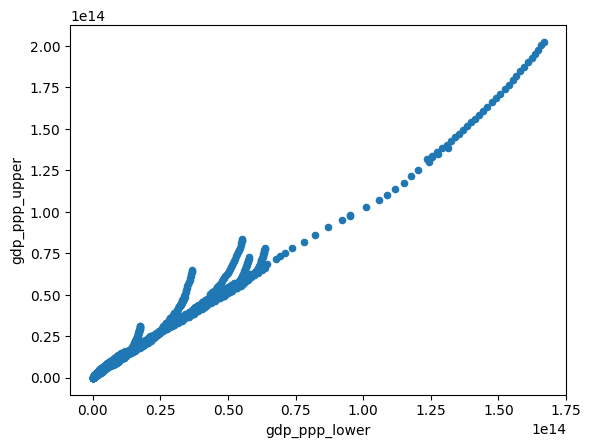

In [43]:
# 5. Analiza zależności między kolumnami
# Zbadaj zależności między różnymi kolumnami poprzez obliczenie współczynników korelacji.
numeric_df = df.select_dtypes(include=['number']) # wybierz tylko kolumny numeryczne
correlation = numeric_df.corr()
# print('Macierz korelacji:')
# print(correlation)
numeric_df.plot.scatter(x='gdp_ppp_lower', y='gdp_ppp_upper')

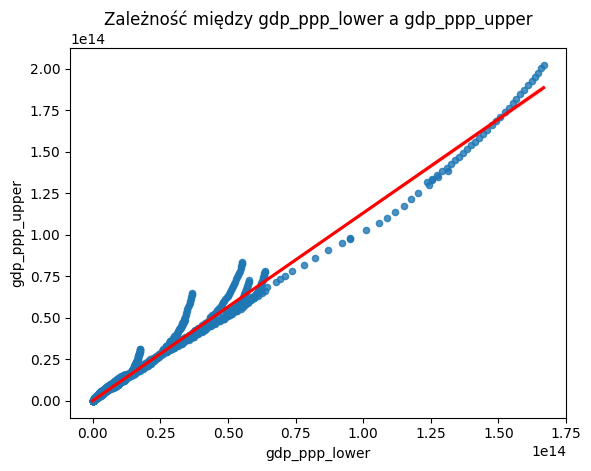

In [44]:
# 5. Analiza zależności między kolumnami (z linią regresji)

import seaborn as sns
import matplotlib.pyplot as plt

# Zbadaj zależności między różnymi kolumnami poprzez obliczenie współczynników korelacji.
numeric_df = df.select_dtypes(include=['number']) # wybierz tylko kolumny numeryczne
sns.regplot(x='gdp_ppp_lower', y='gdp_ppp_upper', data=numeric_df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Zależność między gdp_ppp_lower a gdp_ppp_upper')
plt.show()

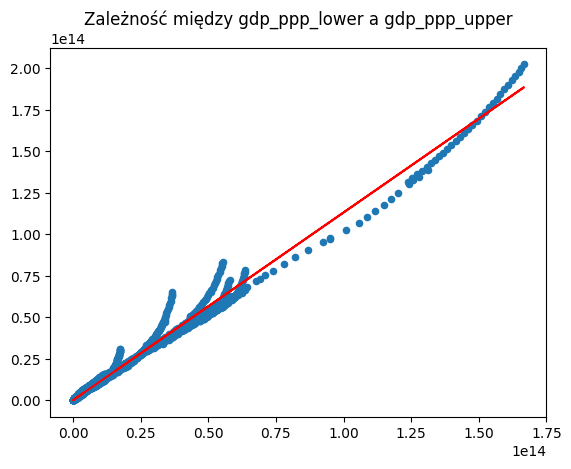

In [45]:
# 5. Analiza zależności między kolumnami (alternatywnie)
import numpy as np
x = numeric_df['gdp_ppp_lower']
y = numeric_df['gdp_ppp_upper']
slope, intercept = np.polyfit(x, y, 1) # Oblicz współczynniki regresji (liniowa regresja)
plt.scatter(x, y, s=20) # Tworzymy wykres rozrzutu
plt.plot(x, slope * x + intercept, color='red') # Dodaj linię regresji
plt.title('Zależność między gdp_ppp_lower a gdp_ppp_upper')
plt.show()

In [46]:
# 6. Przekształcanie danych
df['gdp_ppp_diff'] = df['gdp_ppp_upper'] - df['gdp_ppp_lower'] # Dodanie nowej kolumny

mean_diff = df.groupby('location_name')['gdp_ppp_diff'].mean() # Grupowanie wg nazwy kraju i obliczanie średniej wartości gdp_ppp_diff:
print('Średnia różnica między gdp_ppp_upper a gdp_ppp_lower dla poszczególnych krajów:')
print(mean_diff)

# Sortowanie po kolumnie year:
df = df.sort_values(by='year', ascending=True)
print(df.head())

Średnia różnica między gdp_ppp_upper a gdp_ppp_lower dla poszczególnych krajów:
location_name
Afghanistan                            1413.412350
Albania                                3310.023453
Algeria                                4607.599093
American Samoa                         3479.864825
Andorra                               11830.056188
                                          ...     
Venezuela (Bolivarian Republic of)     8096.820512
Viet Nam                               4157.516836
Yemen                                  2963.275206
Zambia                                 1817.071337
Zimbabwe                               1829.976392
Name: gdp_ppp_diff, Length: 216, dtype: float64
       location_id                     location_name iso3    level  year  \
13832          171  Democratic Republic of the Congo  COD  Country  1960   
6097            79                           Finland  FIN  Country  1960   
10465          132                            Panama  PAN  Country  1